# **Estudo e Analise do Dataset do Governo**
- Student dropout
---
- Link: https://dados.gov.br/dados/conjuntos-dados/ifce-matriculas  
Dados relacionados às matrículas de estudantes que ingressaram no IFCE desde 2009, com informações sobre o aluno, situação da matrícula e curso realizado

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Base de Dados

In [2]:
# Base de Dados
ds = pd.read_csv('./data/IFCE-MATRICULAS.csv')
ds.head()

,COD_MATRICULA,COD_PESSOA,GENERO,ANO_INICIO,MOD_ENSINO,NIVEL_ENSINO,NOME_CURSO,MOD_CURSO,SIT_MATRICULA,CAMPUS
0,3,3,Masculino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
1,5,5,Feminino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
2,6,6,Masculino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
3,7,7789,Feminino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
4,9,9,Masculino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA


### Intendendo os dados 

In [3]:
# Tamanho
ds.shape

(254248, 10)

In [4]:
#Informação
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254248 entries, 0 to 254247
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   COD_MATRICULA  254248 non-null  int64 
 1   COD_PESSOA     254248 non-null  int64 
 2   GENERO         254248 non-null  object
 3   ANO_INICIO     254248 non-null  int64 
 4   MOD_ENSINO     254248 non-null  object
 5   NIVEL_ENSINO   254248 non-null  object
 6   NOME_CURSO     254248 non-null  object
 7   MOD_CURSO      254244 non-null  object
 8   SIT_MATRICULA  254248 non-null  object
 9   CAMPUS         254248 non-null  object
dtypes: int64(3), object(7)
memory usage: 19.4+ MB


In [5]:
ds.describe()

,COD_MATRICULA,COD_PESSOA,ANO_INICIO
count,254248.000000,254248.000000,254248.000000
mean,229324.517223,183970.501318,2015.122294
std,143723.799236,118073.978155,6.132698
min,1.000000,1.000000,1950.000000
25%,99870.750000,78234.000000,2012.000000
50%,231570.500000,182324.500000,2017.000000
75%,357605.250000,280843.250000,2020.000000
max,471538.000000,400690.000000,2022.000000


In [6]:
# Valores nulos 
ds.isnull().sum()

COD_MATRICULA    0
COD_PESSOA       0
GENERO           0
ANO_INICIO       0
MOD_ENSINO       0
NIVEL_ENSINO     0
NOME_CURSO       0
MOD_CURSO        4
SIT_MATRICULA    0
CAMPUS           0
dtype: int64

### Limpeza de Dados

In [7]:
# Eliminado a coluna id
ds = ds.drop(['COD_MATRICULA', 'COD_PESSOA'], axis=1)
ds.head()

,GENERO,ANO_INICIO,MOD_ENSINO,NIVEL_ENSINO,NOME_CURSO,MOD_CURSO,SIT_MATRICULA,CAMPUS
0,Masculino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
1,Feminino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
2,Masculino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
3,Feminino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA
4,Masculino,2000,Presencial,Técnico,Edificacoes - Técnico Antigo,Integrado,Matriculado,CAMPUS FORTALEZA


### EDA

<Axes: ylabel='SIT_MATRICULA'>

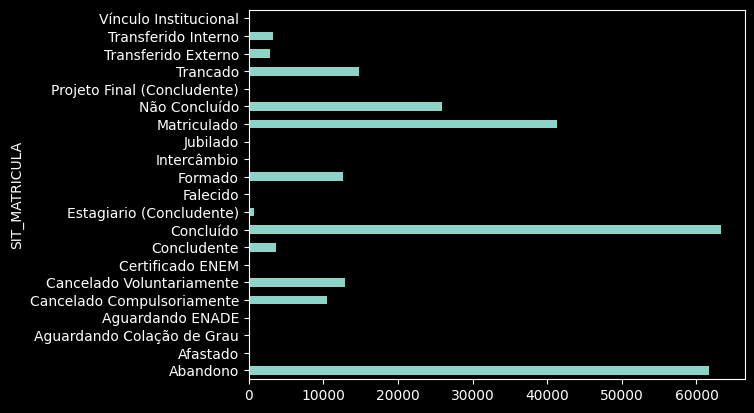

In [8]:
situacao_matricula = ds.groupby(['SIT_MATRICULA']).size()
situacao_matricula.plot.barh()


In [9]:
# contando os valores da coluna situação
ds['SIT_MATRICULA'].value_counts()

SIT_MATRICULA
Concluído                      63295
Abandono                       61621
Matriculado                    41326
Não Concluído                  25909
Trancado                       14828
Cancelado Voluntariamente      12888
Formado                        12686
Cancelado Compulsoriamente     10542
Concludente                     3641
Transferido Interno             3228
Transferido Externo             2820
Estagiario (Concludente)         705
Aguardando Colação de Grau       245
Projeto Final (Concludente)      197
Aguardando ENADE                 159
Falecido                         102
Jubilado                          34
Intercâmbio                        9
Vínculo Institucional              8
Certificado ENEM                   3
Afastado                           2
Name: count, dtype: int64

In [10]:
# Realocando os dados
ds.loc[ds['SIT_MATRICULA'].isin([
    'Trancado', 'Cancelado Voluntariamente', 'Cancelado Compulsoriamente', 'Falecido', 'Afastado'
]), 'SIT_MATRICULA'] = 'Abandono'
ds['SIT_MATRICULA'].value_counts()

SIT_MATRICULA
Abandono                       99983
Concluído                      63295
Matriculado                    41326
Não Concluído                  25909
Formado                        12686
Concludente                     3641
Transferido Interno             3228
Transferido Externo             2820
Estagiario (Concludente)         705
Aguardando Colação de Grau       245
Projeto Final (Concludente)      197
Aguardando ENADE                 159
Jubilado                          34
Intercâmbio                        9
Vínculo Institucional              8
Certificado ENEM                   3
Name: count, dtype: int64

In [11]:
# Realocando os dados de Concluído
ds.loc[ds['SIT_MATRICULA'].isin([
    'Formado', 'Concludente', 'Estagiario (Concludente)', 'Aguardando Colação de Grau', 'Projeto Final (Concludente)'
]), 'SIT_MATRICULA'] = 'Concluído'
ds['SIT_MATRICULA'].value_counts()

SIT_MATRICULA
Abandono                 99983
Concluído                80769
Matriculado              41326
Não Concluído            25909
Transferido Interno       3228
Transferido Externo       2820
Aguardando ENADE           159
Jubilado                    34
Intercâmbio                  9
Vínculo Institucional        8
Certificado ENEM             3
Name: count, dtype: int64

In [12]:
# Realocando os dados de Matriculado
ds.loc[ds['SIT_MATRICULA'].isin([
    'Não Concluído', 'Aguardando ENADE', 'Jubilado', 'Intercâmbio', 'Vínculo Institucional'
]), 'SIT_MATRICULA'] = 'Matriculado'
ds['SIT_MATRICULA'].value_counts()

SIT_MATRICULA
Abandono               99983
Concluído              80769
Matriculado            67445
Transferido Interno     3228
Transferido Externo     2820
Certificado ENEM           3
Name: count, dtype: int64

In [13]:
# Eliminado valores irrelevante
values_to_drop = ['Transferido Interno', 'Transferido Externo', 'Certificado ENEM']
# eliminado os matriculados
ds.drop(ds[ds['SIT_MATRICULA'].isin(values_to_drop)].index, inplace=True)
ds['SIT_MATRICULA'].value_counts()

SIT_MATRICULA
Abandono       99983
Concluído      80769
Matriculado    67445
Name: count, dtype: int64

### Gráficos

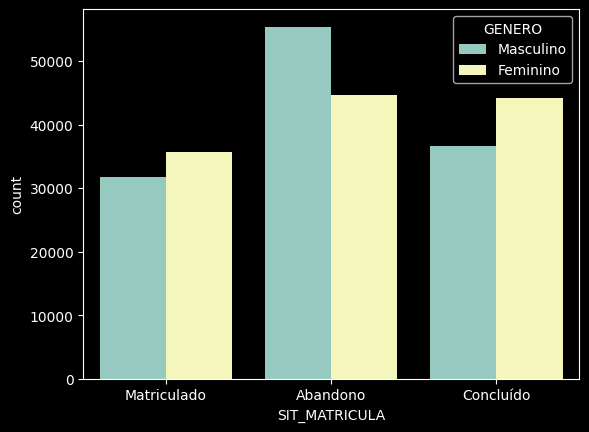

In [14]:
sns.countplot(x=ds['SIT_MATRICULA'], hue=ds['GENERO']);